In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv( r"C:\Users\User\Documents\GitHub\credit-risk-sentiment-nps\data\03_processed_data_ready_to_analyze.csv")
# df=pd.read_csv( r"C:\Users\User\Documents\GitHub\credit-risk-sentiment-nps\data\official\credit_risk_after_data_cleansing.csv")

In [2]:
# PART 1: Exploratory Data Analysis (EDA)
# df.describe().T

In [4]:
# 2. Check Missing Values
# df.isnull().sum().sort_values(ascending=False)


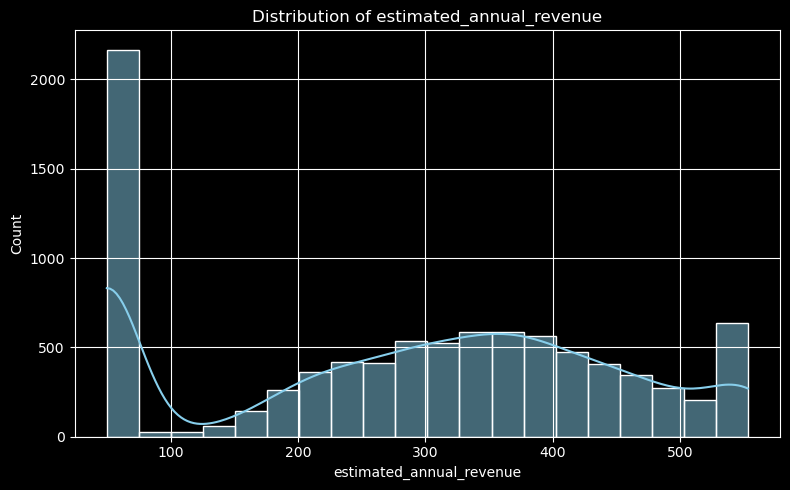

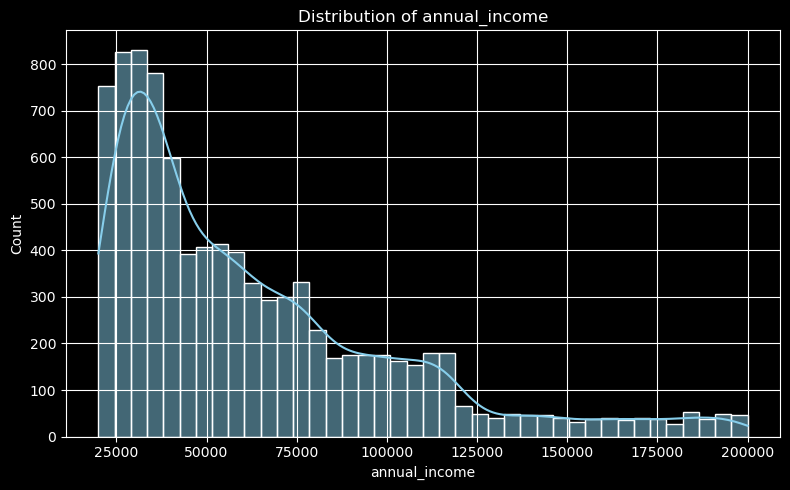

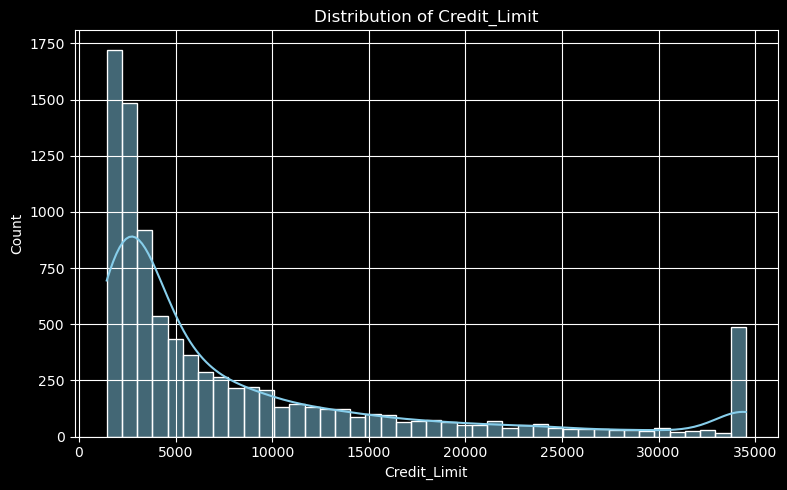

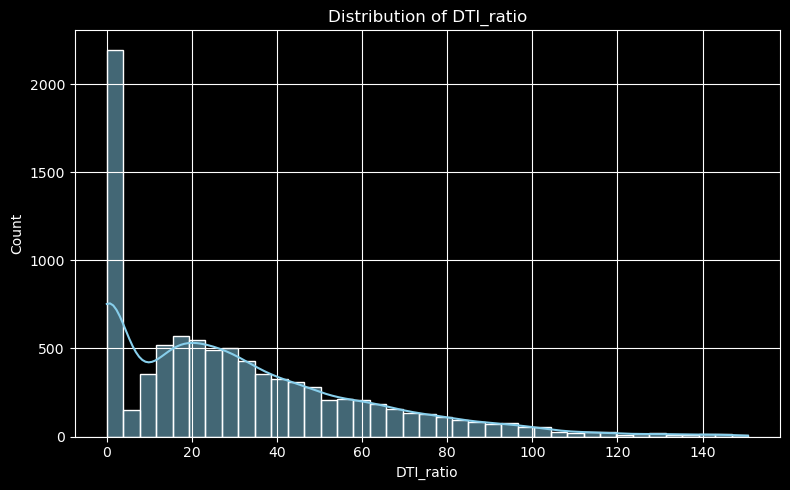

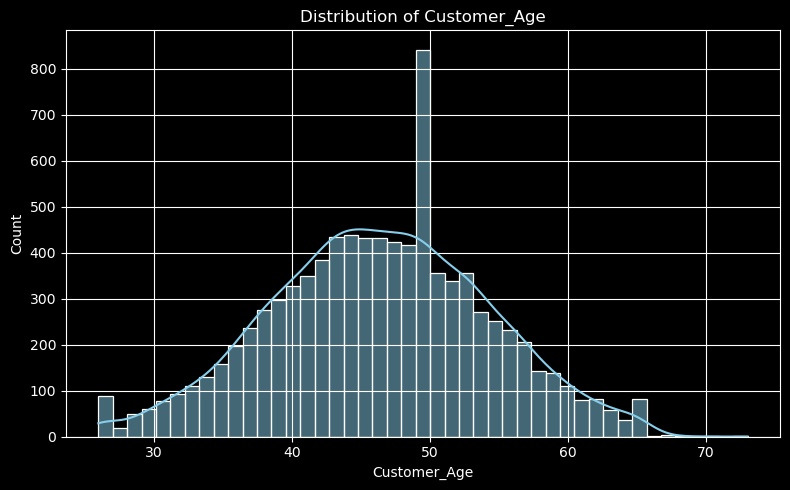

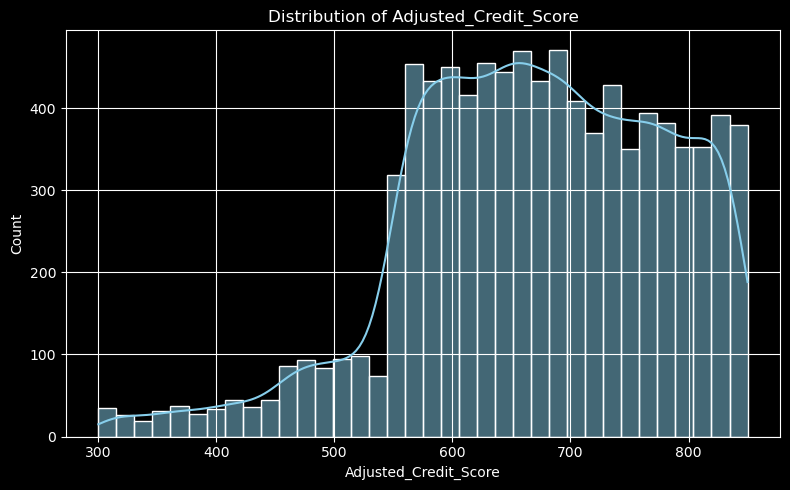

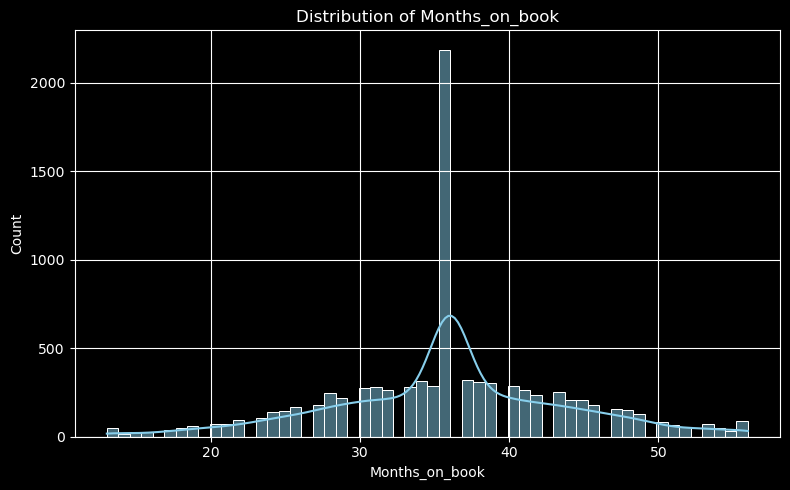

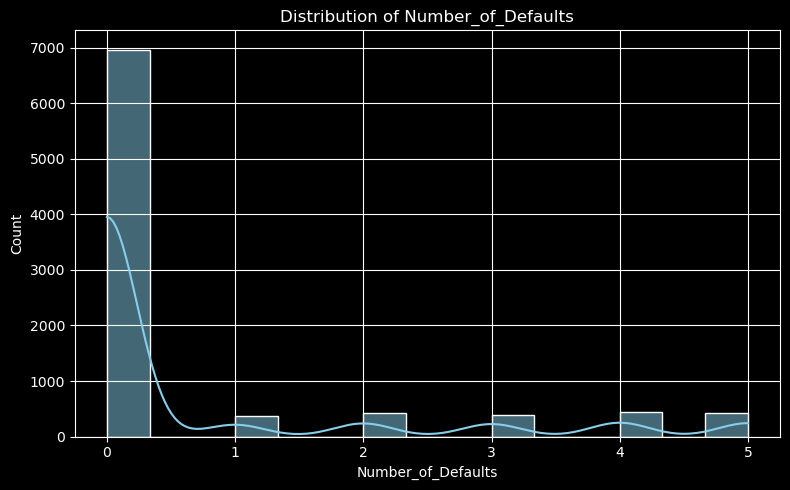

In [2]:
# 3. Distributions of Key Metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Set black background style
plt.style.use('dark_background')


num_cols = ['estimated_annual_revenue','annual_income', 'Credit_Limit', 'DTI_ratio', 'Customer_Age',
            'Adjusted_Credit_Score','Months_on_book','Number_of_Defaults',]

for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


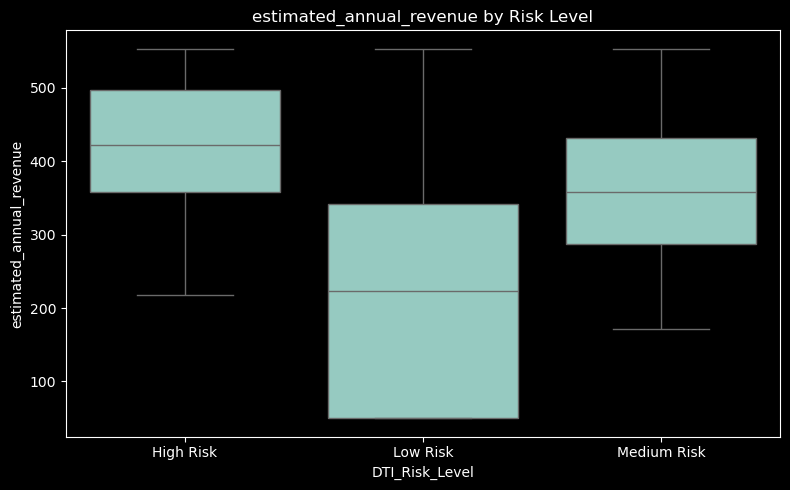

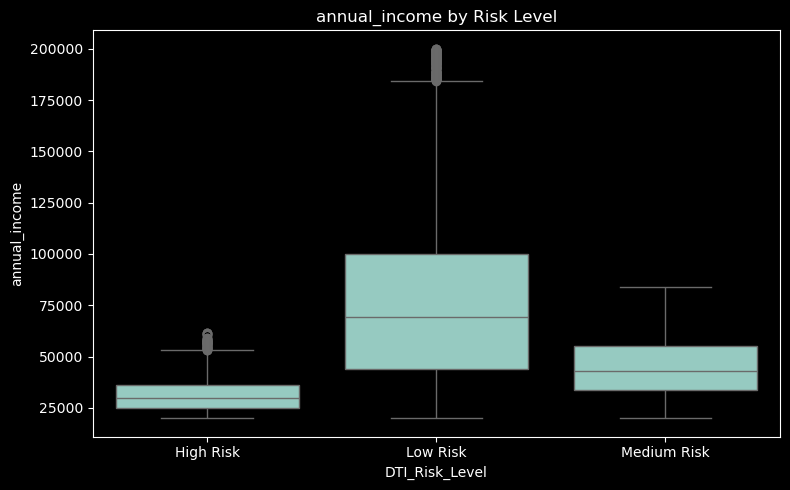

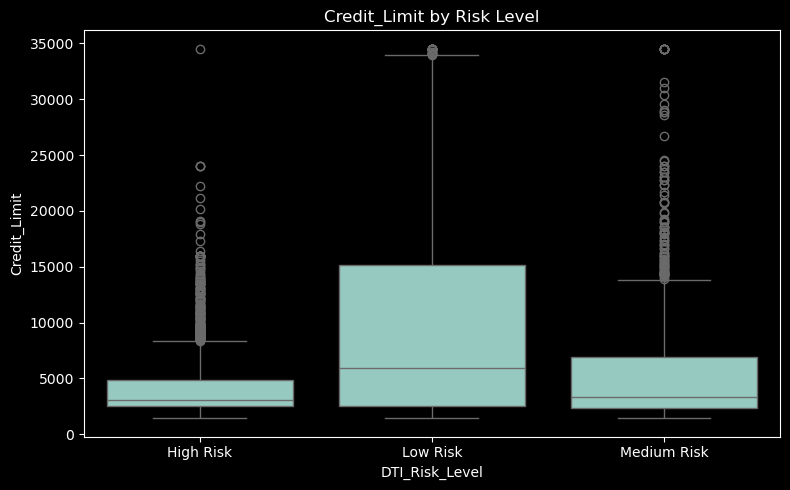

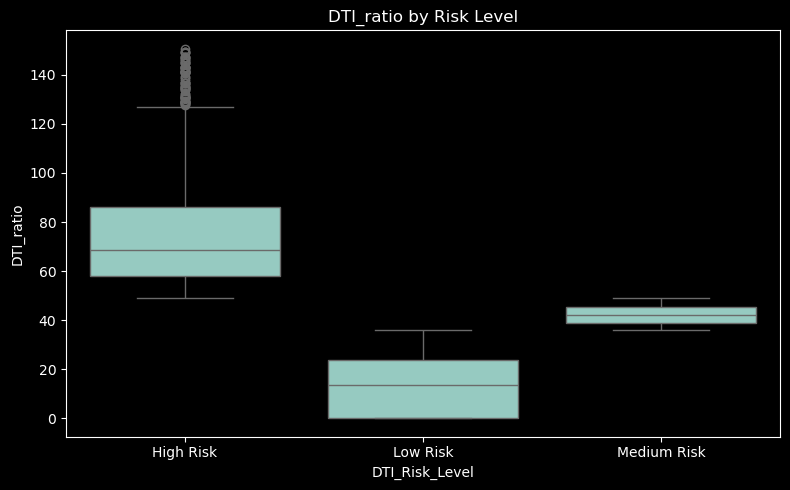

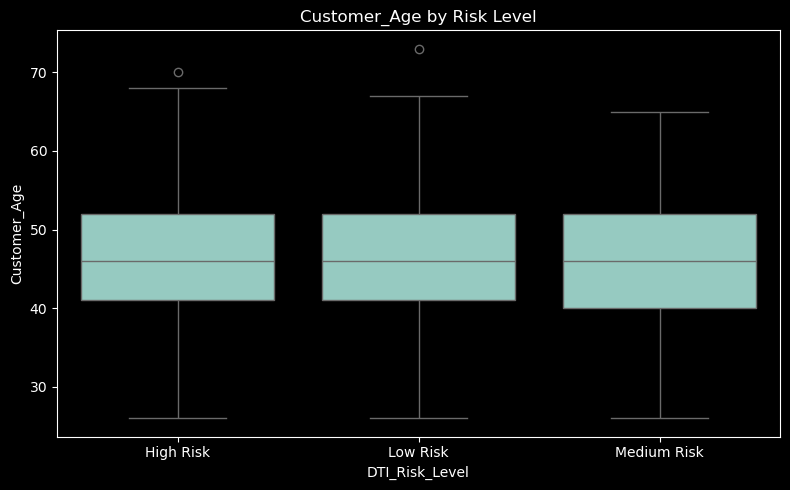

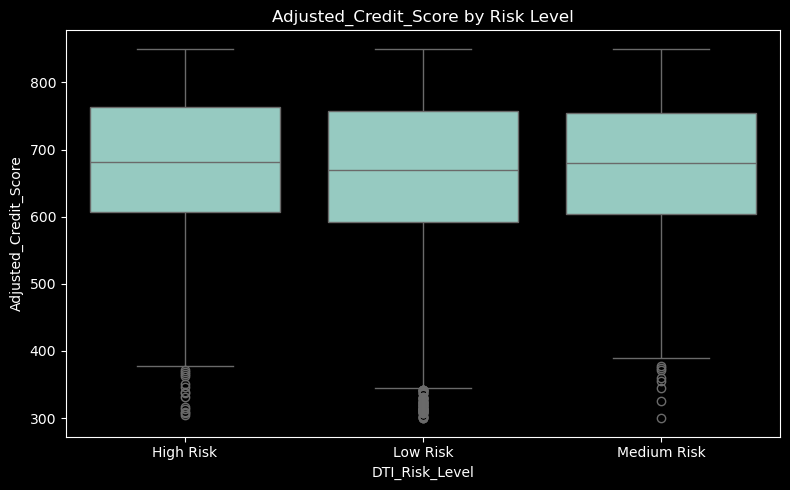

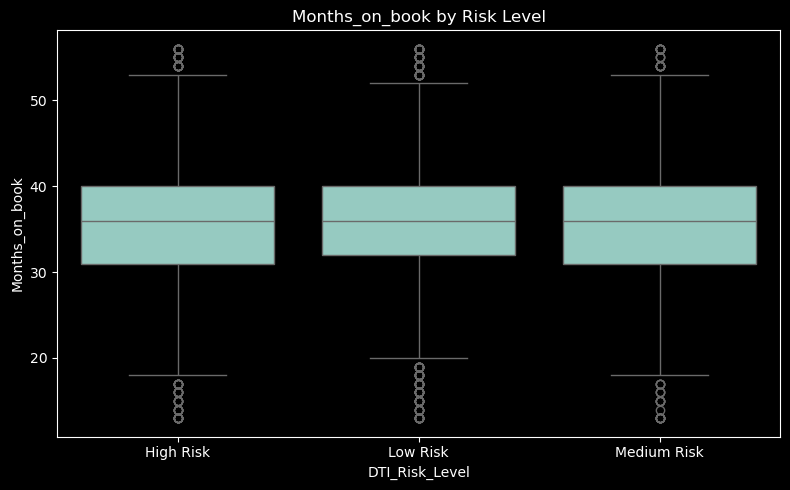

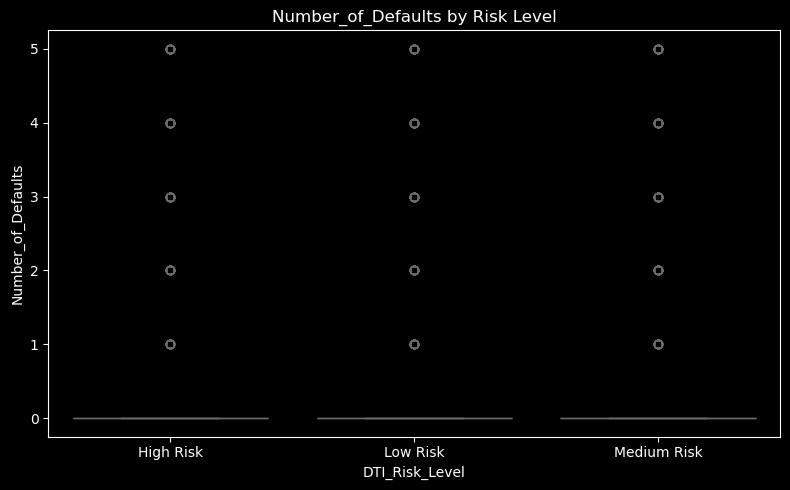

In [10]:
# 4. Boxplots by Risk Status
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='DTI_Risk_Level', y=col, data=df)
    plt.title(f'{col} by Risk Level')
    plt.tight_layout()
    plt.show()


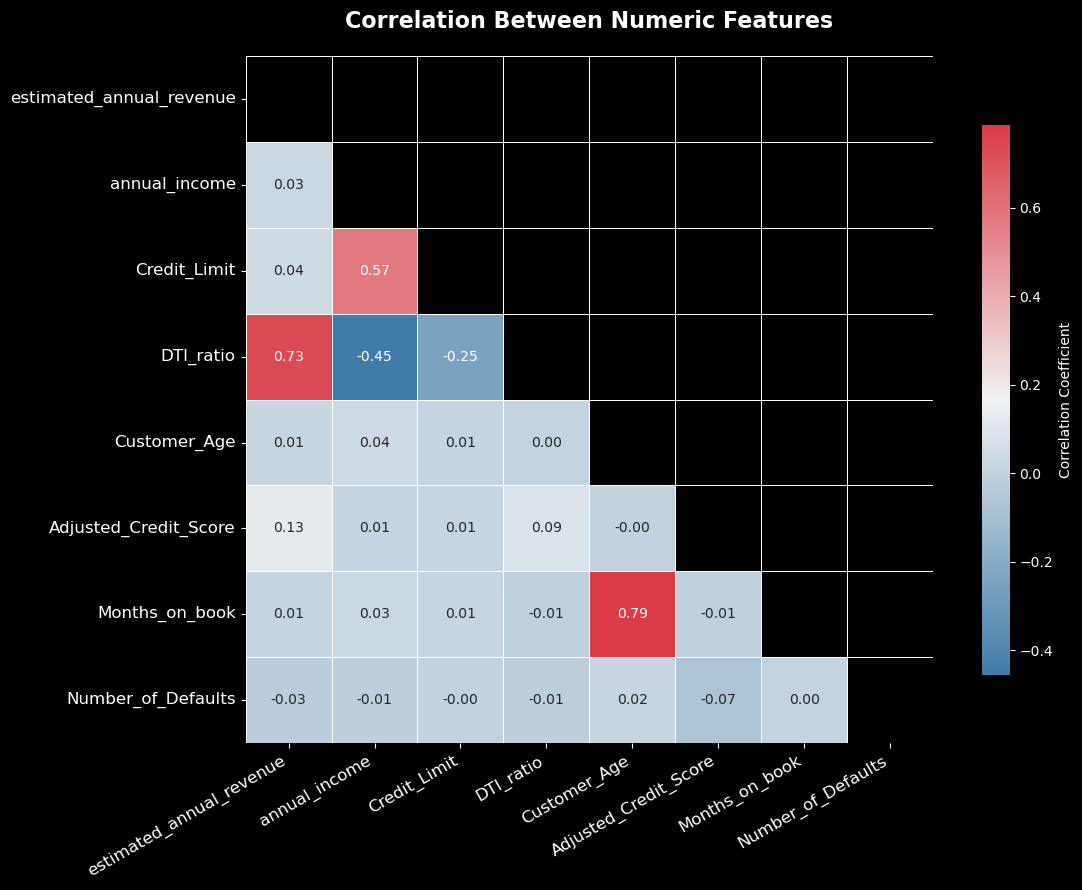

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = df[num_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set style
plt.style.use('dark_background')

# Figure
plt.figure(figsize=(12, 9))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap=sns.diverging_palette(240, 10, as_cmap=True),
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

# Improve label appearance
plt.xticks(
    ticks=np.arange(len(corr.columns)) + 0.5,
    labels=corr.columns,
    rotation=30,
    ha='right',
    fontsize=12
)
plt.yticks(
    ticks=np.arange(len(corr.columns)) + 0.5,
    labels=corr.columns,
    rotation=0,
    fontsize=12
)

# Title
plt.title(
    'Correlation Between Numeric Features',
    fontsize=16,
    fontweight='bold',
    pad=20
)

plt.tight_layout()
plt.show()


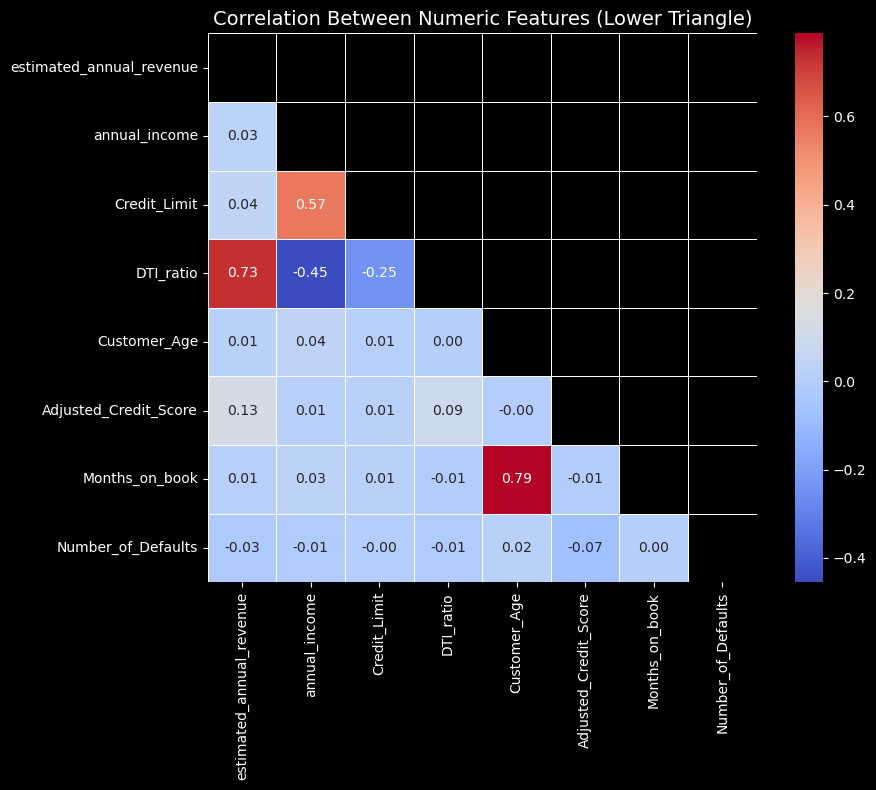

In [11]:
# 5. Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = df[num_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the plot style
plt.style.use('dark_background')  # Optional: dark theme

# Plot the heatmap with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Between Numeric Features (Lower Triangle)', fontsize=14)
plt.tight_layout()
plt.show()


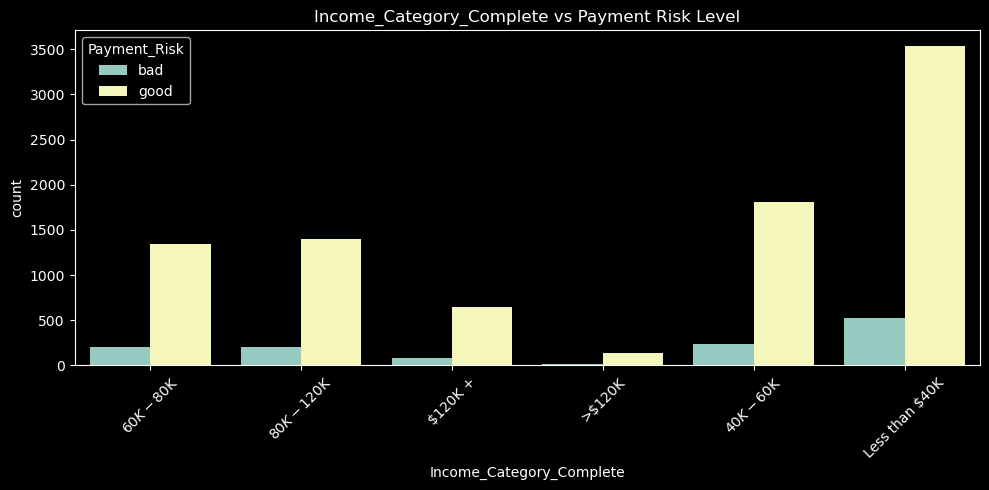

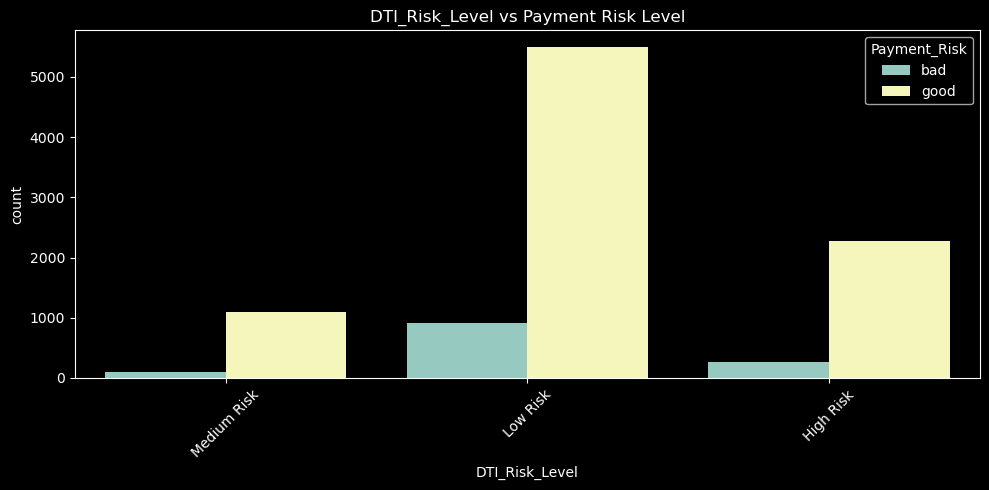

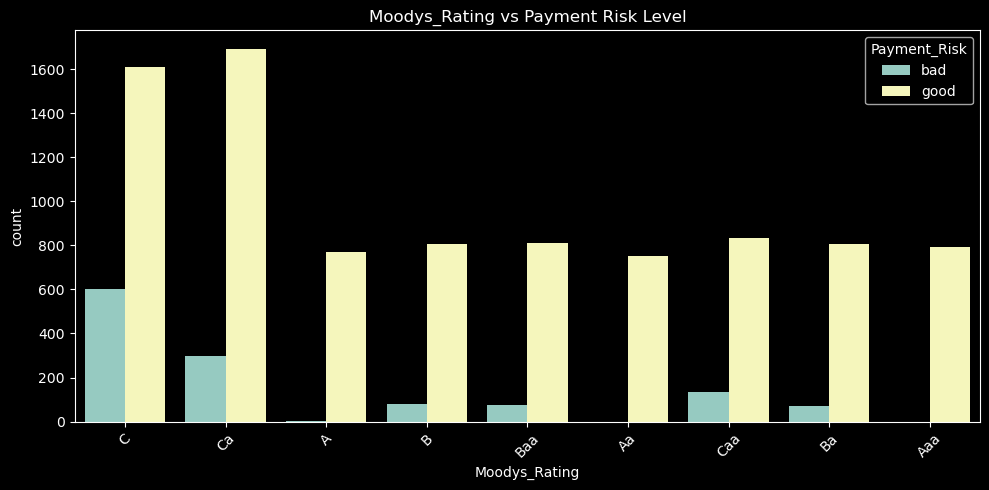

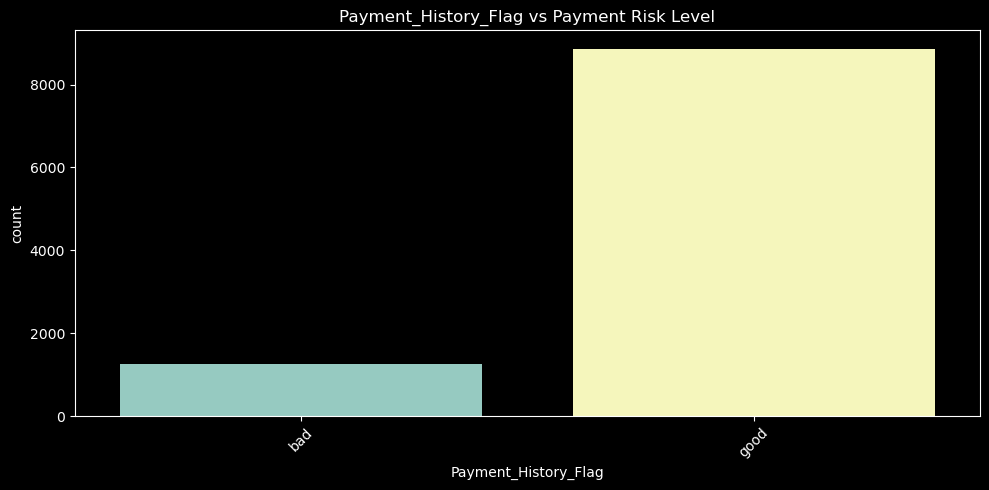

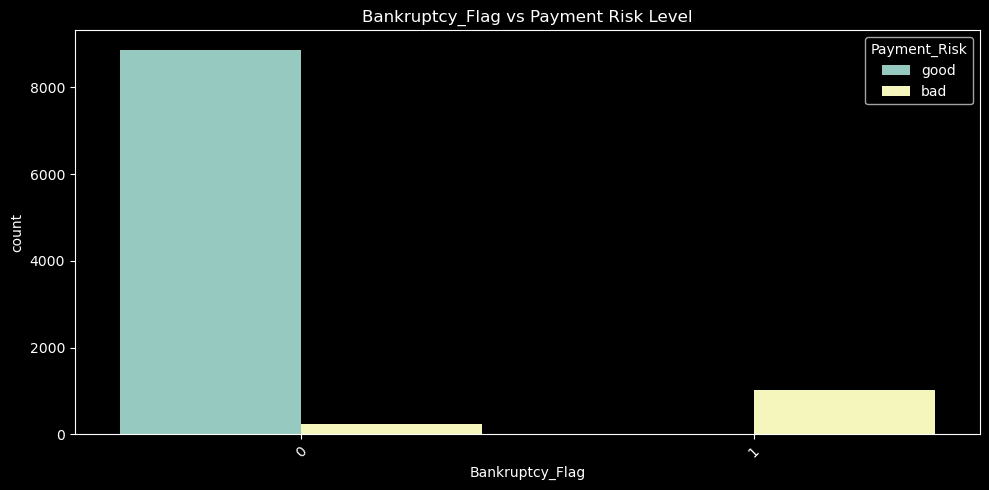

In [25]:
# 6. Categorical Group Insights
cat_cols = ['Income_Category_Complete', 'DTI_Risk_Level','Moodys_Rating','Payment_History_Flag', 'Bankruptcy_Flag',]
# Set black background style
plt.style.use('dark_background')

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='Payment_Risk', data=df)
    plt.title(f'{col} vs Payment Risk Level')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [23]:
df['Moodys_Rating'].unique()

array(['C', 'B', 'Aa', 'A', 'Caa', 'Ca', 'Baa', 'Aaa', 'Ba'], dtype=object)

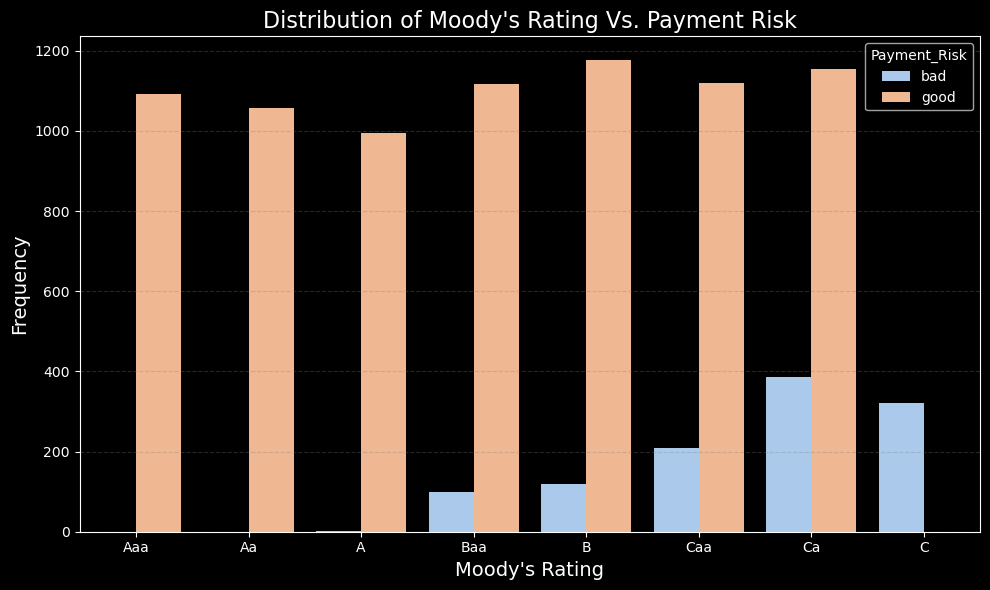

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define Moody's rating order
moodys_order = ['Aaa', 'Aa', 'A', 'Baa', 'B', 'Caa', 'Ca', 'C']

# Convert Moodys_Rating to ordered categorical
df['Moodys_Rating'] = pd.Categorical(df['Moodys_Rating'], categories=moodys_order, ordered=True)

# Drop rows where Moodys_Rating or Payment_Risk is missing
data = df.dropna(subset=['Moodys_Rating', 'Payment_Risk'])

plt.style.use('dark_background')  # Black background style
plt.figure(figsize=(10, 6))

sns.countplot(
    data=data,
    x='Moodys_Rating',
    order=moodys_order,
    hue='Payment_Risk',
    palette='pastel'  # lighter colors to contrast with dark bg
)

plt.title("Distribution of Moody's Rating Vs. Payment Risk", fontsize=16)
plt.xlabel("Moody's Rating", fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Optional: light grid lines for y-axis
plt.grid(True, axis='y', color='gray', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


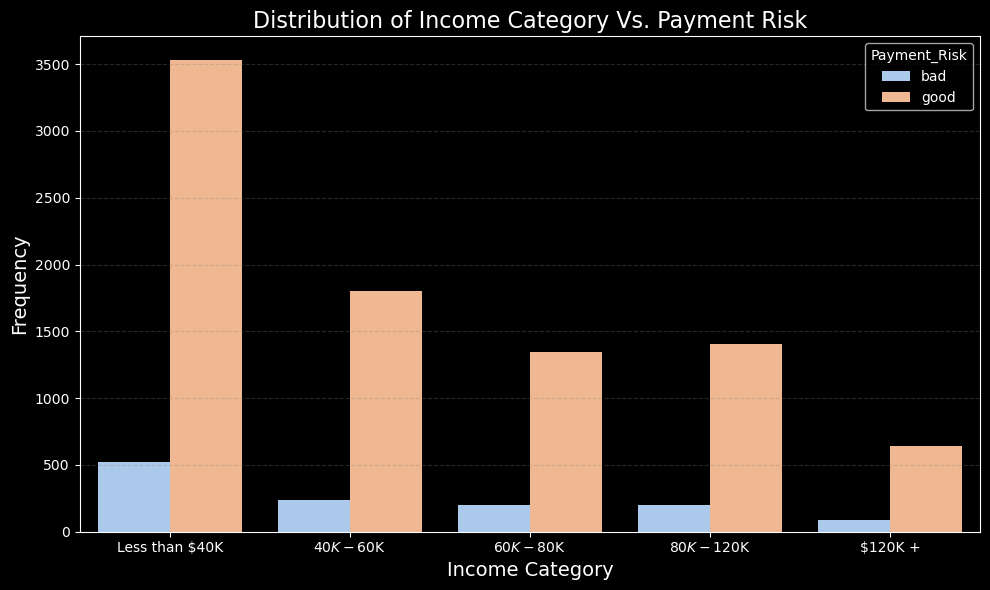

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the desired income category order
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

# Convert to ordered categorical
df['Income_Category_Complete'] = pd.Categorical(df['Income_Category_Complete'], categories=income_order, ordered=True)

# Drop rows with missing Income_Category_Complete or Payment_Risk
data = df.dropna(subset=['Income_Category_Complete', 'Payment_Risk'])

plt.style.use('dark_background')  # Optional for black background
plt.figure(figsize=(10, 6))

sns.countplot(
    data=data,
    x='Income_Category_Complete',
    order=income_order,
    hue='Payment_Risk',
    palette='pastel'  # lighter colors for dark bg
)

plt.title('Distribution of Income Category Vs. Payment Risk', fontsize=16)
plt.xlabel('Income Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add subtle grid on y axis for readability
plt.grid(True, axis='y', color='gray', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()



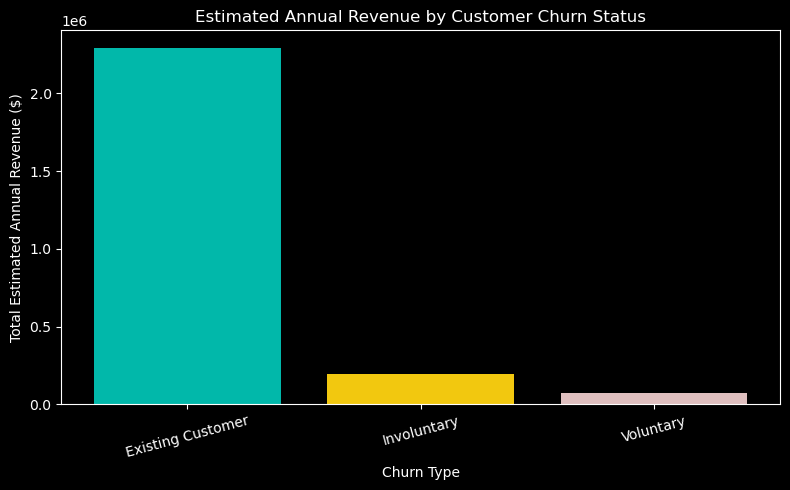

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Step 2: Group by Attrition_Flag and sum revenue
revenue_by_attrition = df.groupby('Churn_Type')['estimated_annual_revenue'].sum().reset_index()

# Define a different color for each bar
# Power BI-like colors (bright, high contrast)
colors = [
    '#01B8AA',  # teal
    '#F2C80F',  # yellow gold
    '#DFBFBF'   # light pink gray
]


# Step 3: Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(revenue_by_attrition['Churn_Type'], 
        revenue_by_attrition['estimated_annual_revenue'],
        color=colors[:len(revenue_by_attrition)]  # only use as many colors as bars
)

plt.xlabel('Churn Type')
plt.ylabel('Total Estimated Annual Revenue ($)')
plt.title('Estimated Annual Revenue by Customer Churn Status')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


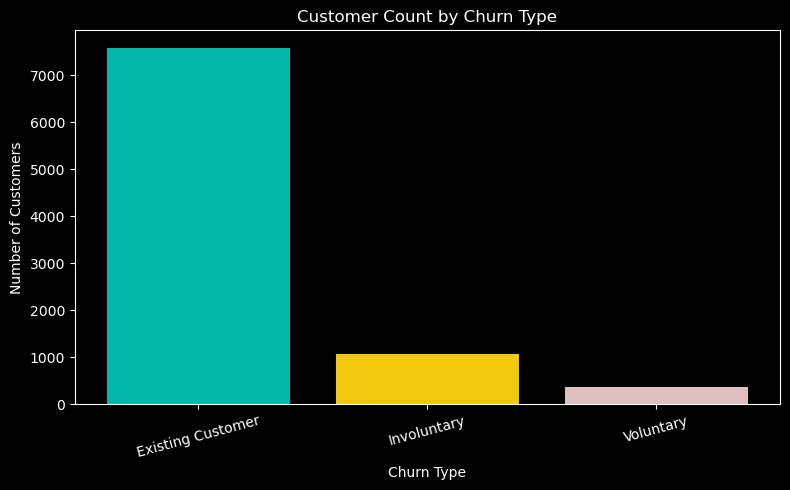

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Count customers per attrition type
count_by_type = df['Churn_Type'].value_counts().reset_index()
count_by_type.columns = ['Churn_Type', 'Customer_Count']

colors = [
    '#01B8AA',  # teal
    '#F2C80F',  # yellow gold
    '#DFBFBF'   # light pink gray
]

# Step 4: Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(count_by_type['Churn_Type'], 
        count_by_type['Customer_Count'],
        color=colors[:len(revenue_by_attrition)]  # only use as many colors as bars
)
plt.xlabel('Churn Type')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Churn Type')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


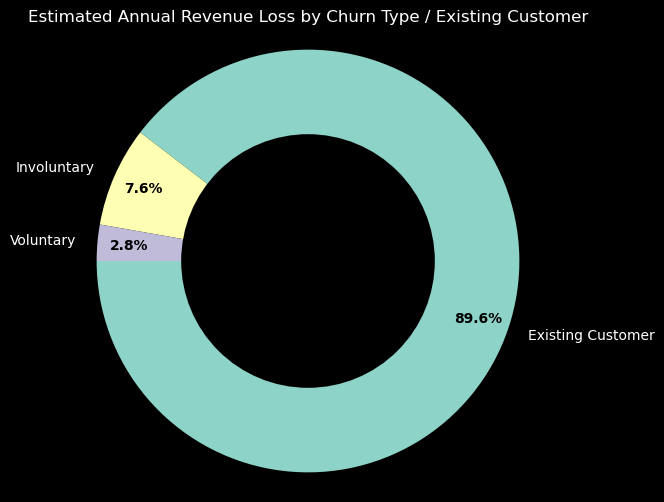

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Calculate revenue loss per attrition type
revenue_loss = df.groupby('Churn_Type')['estimated_annual_revenue'].sum()

# Pie chart as donut
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    revenue_loss,
    labels=revenue_loss.index,
    autopct='%1.1f%%',
    startangle=180,
    pctdistance=0.85 , # move percentage labels closer to outside
    textprops={'color': 'white'}  # label color
)

# Change percentage color to black
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')


# Draw a circle in the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.60, fc='black')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')

plt.title('Estimated Annual Revenue Loss by Churn Type / Existing Customer')
plt.show()  

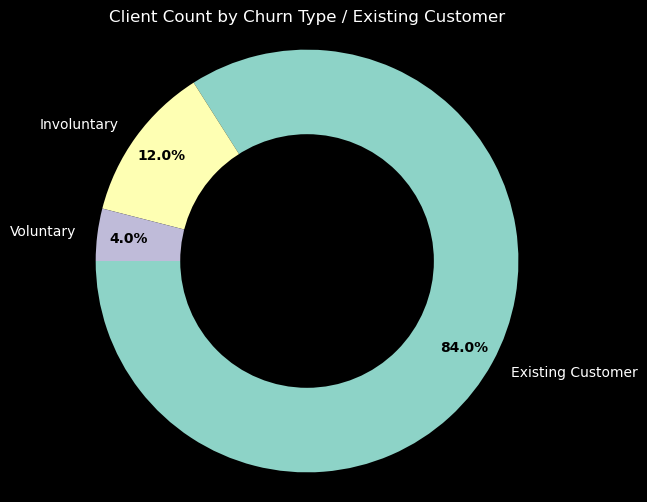

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count CLIENTNUM per attrition type
client_counts = df.groupby('Churn_Type')['CLIENTNUM'].count()

# Pie chart as donut
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    client_counts,
    labels=client_counts.index,
    autopct='%1.1f%%',
    startangle=180,
    pctdistance=0.85,  # move percentage labels closer to outside
    textprops={'color': 'white'}  # label color
)

# Change percentage color to black
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# Draw a circle in the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.60, fc='black')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')

plt.title('Client Count by Churn Type / Existing Customer')
plt.show()



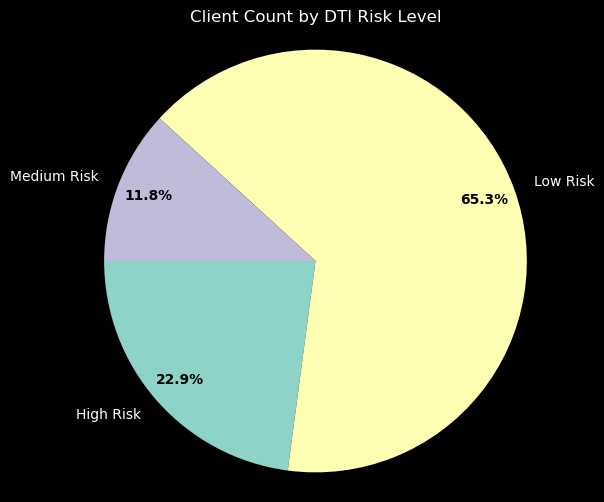

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count CLIENTNUM per attrition type
client_counts = df.groupby('DTI_Risk_Level')['CLIENTNUM'].count()

# Pie chart as donut
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    client_counts,
    labels=client_counts.index,
    autopct='%1.1f%%',
    startangle=180,
    pctdistance=0.85,  # move percentage labels closer to outside
    textprops={'color': 'white'}  # label color
)

# Change percentage color to black
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# # Draw a circle in the center to make it a donut
# centre_circle = plt.Circle((0, 0), 0.60, fc='black')
# fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')

plt.title('Client Count by DTI Risk Level')
plt.show()



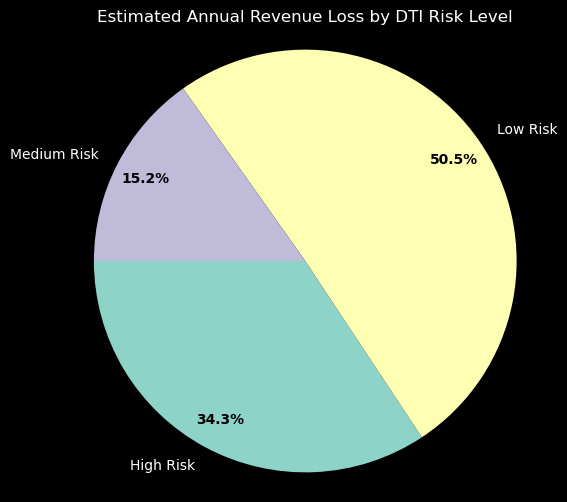

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Calculate revenue loss per attrition type
revenue_loss = df.groupby('DTI_Risk_Level')['estimated_annual_revenue'].sum()

# Pie chart as donut
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    revenue_loss,
    labels=revenue_loss.index,
    autopct='%1.1f%%',
    startangle=180,
    pctdistance=0.85 , # move percentage labels closer to outside
    textprops={'color': 'white'}  # label color
)

# Change percentage color to black
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')


# Draw a circle in the center to make it a donut
# centre_circle = plt.Circle((0, 0), 0.60, fc='black')
# fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')

plt.title('Estimated Annual Revenue Loss by DTI Risk Level')
plt.show()  

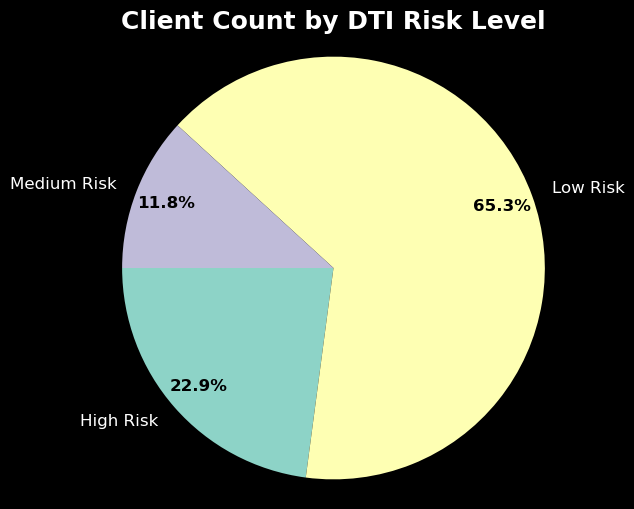

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count CLIENTNUM per attrition type
client_counts = df.groupby('DTI_Risk_Level')['CLIENTNUM'].count()

# Pie chart as donut
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    client_counts,
    labels=client_counts.index,
    autopct='%1.1f%%',
    startangle=180,
    pctdistance=0.85,  # move percentage labels closer to outside
    textprops={'color': 'white','fontsize': 12}  # label color
)

# Change percentage color to black
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# # Draw a circle in the center to make it a donut
# centre_circle = plt.Circle((0, 0), 0.60, fc='black')
# fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')

plt.title('Client Count by DTI Risk Level', fontsize=18, fontweight='bold')
plt.show()

